### __Импорт библиотек__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import dendrogram, linkage

### __Загрузка данных и их подготовка к анализу__

In [2]:
# Чтение данных digit.dat
data = pd.read_csv('../10_Цифры/digit.dat', sep=';')

# Очистка данных от лишних пробелов
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Преобразование категориальных данных (замена текста на цифры)
data.replace({
    'ZERO': 0,
    'ONE': 1,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9
}, inplace=True)

# Преобразование столбца 'A' в числовой тип данных
data['A'] = pd.to_numeric(data['A'], errors='coerce')

# Выбор переменных
selected_columns = ['B', 'C', 'D', 'E', 'F', 'G', 'H']  # Var1,..., Var7

data_X = data[selected_columns]
data_Y = data['A']  # Digit (зависимая переменная)

/tmp/ipykernel_98403/3789133248.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipykernel_98403/3789133248.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


### __Стандартизация данных__

In [3]:
# Стандартизация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_X)


### __Визуализация иерархической кластеризации__

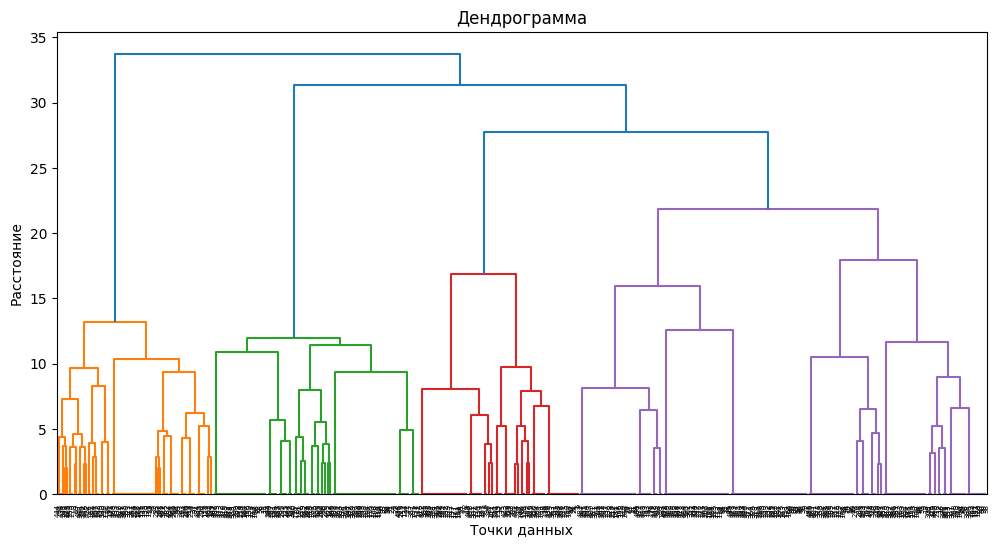

In [5]:
# Иерархическая кластеризация
linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

# Визуализация дендрограммы
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Дендрограмма')
plt.xlabel('Точки данных')
plt.ylabel('Расстояние')
plt.show()

### __Построение метода "локтя"__

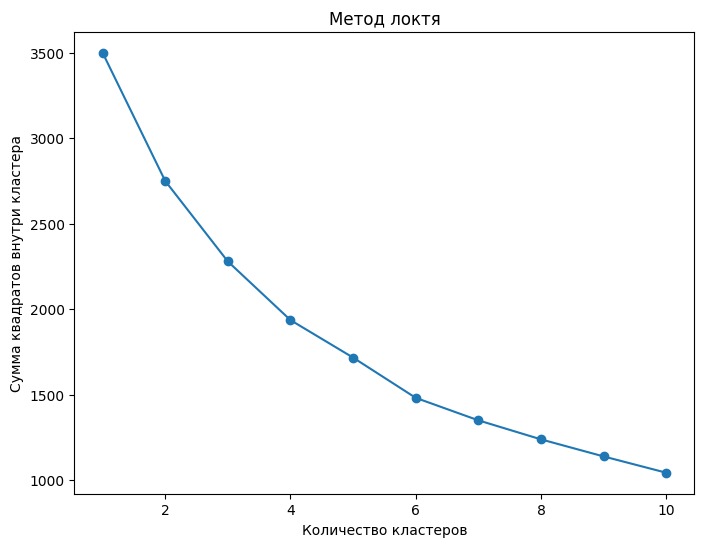

In [6]:
# Определение оптимального числа кластеров (метод "локоть")
distances = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=12, algorithm='lloyd')
    kmeans.fit(data_scaled)
    distances.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distances, marker='o', linestyle='-')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов внутри кластера')


plt.show()

### __Кластеризация методом k средних__

In [4]:
# Кластеризация методом k средних для 5 кластеров
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0, algorithm='lloyd')
kmeans.fit(data_scaled)

KMeans(n_clusters=5, random_state=0)

### __Многомерное шкалирование__

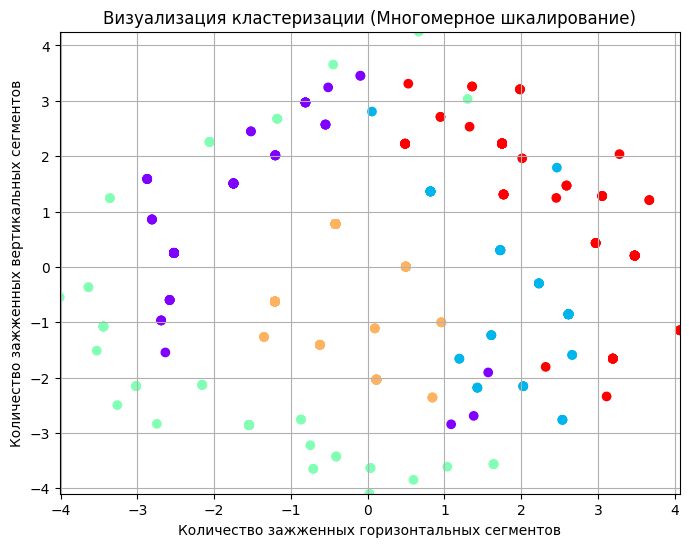

In [5]:
# Многомерное шкалирование для визуализации
mds = MDS(n_components=2, random_state=0)
data_2d = mds.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('Визуализация кластеризации (Многомерное шкалирование)')
plt.xlabel('Количество зажженных горизонтальных сегментов')
plt.ylabel('Количество зажженных вертикальных сегментов')
plt.show()



### __Интерпретация результатов кластеризации__

In [11]:
# Интерпретация результатов кластеризации
# 'B', 'C', 'D', 'E', 'F', 'G', 'H' <-> Var1,..., Var7
data['Cluster'] = kmeans.labels_
numeric_columns = selected_columns + ['A']
cluster_means = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_means)

                B         C         D         E         F         G         H  \
Cluster                                                                         
0        0.869159  0.878505  0.000000  0.915888  0.485981  1.000000  0.869159   
1        1.000000  0.294118  0.941176  0.352941  0.117647  0.955882  0.044118   
2        0.851351  0.351351  0.729730  0.878378  0.783784  0.000000  0.878378   
3        0.980519  0.727273  1.000000  0.798701  0.506494  1.000000  0.980519   
4        0.000000  0.484536  0.938144  0.546392  0.144330  0.927835  0.226804   

                A  
Cluster            
0        5.641509  
1        6.031250  
2        3.718310  
3        6.699187  
4        3.138298  
